<a href="https://colab.research.google.com/github/linneverh/Sust-Finance/blob/main/assignment_1__Q4_finance_AP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Portfolio Allocation based on Financial Performance

In [81]:
# Import packages

# installing PyPortfolioOpt
!pip install pyportfolioopt

# installing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns
from datetime import datetime, timedelta
import yfinance as yf
import scipy.optimize as sco
import scipy.interpolate as sci
import matplotlib.pyplot as plt
from pypfopt.objective_functions import portfolio_return


In [82]:
#import dataset from git
url_DS_ESGScore_Y = 'https://raw.githubusercontent.com/linneverh/Sust-Finance/refs/heads/main/DS_ESGScore_Y.csv'
DS_ESGScore_Y = pd.read_csv(url_DS_ESGScore_Y)

url_DS_EScore_Y = 'https://raw.githubusercontent.com/linneverh/Sust-Finance/refs/heads/main/DS_EScore_Y.csv'
DS_EScore_Y = pd.read_csv(url_DS_EScore_Y)

url_DS_MV_USD_M = 'https://raw.githubusercontent.com/linneverh/Sust-Finance/refs/heads/main/DS_MV_USD_M.csv'
DS_MV_USD_M = pd.read_csv(url_DS_MV_USD_M)

url_DS_MV_USD_Y = 'https://raw.githubusercontent.com/linneverh/Sust-Finance/refs/heads/main/DS_MV_USD_Y.csv'
DS_MV_USD_Y = pd.read_csv(url_DS_MV_USD_M)

url_DS_REV_USD_Y = 'https://raw.githubusercontent.com/linneverh/Sust-Finance/refs/heads/main/DS_REV_USD_Y.csv'
DS_REV_USD_Y = pd.read_csv(url_DS_REV_USD_Y)

url_DS_RI_USD_M = 'https://raw.githubusercontent.com/linneverh/Sust-Finance/refs/heads/main/DS_RI_USD_M.csv'
DS_RI_USD_M = pd.read_csv(url_DS_RI_USD_M)

url_DS_RI_USD_Y = 'https://raw.githubusercontent.com/linneverh/Sust-Finance/refs/heads/main/DS_RI_USD_Y.csv'
DS_RI_USD_Y = pd.read_csv(url_DS_RI_USD_M)

url_Risk_Free_Rate = 'https://raw.githubusercontent.com/linneverh/Sust-Finance/refs/heads/main/Risk_Free_Rate.csv'
Risk_Free_Rate = pd.read_csv(url_Risk_Free_Rate)

url_Static = 'https://raw.githubusercontent.com/linneverh/Sust-Finance/refs/heads/main/Static.csv'
Static = pd.read_csv(url_Static)


<ipython-input-82-c9f8fe89ee9e>:9: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  DS_MV_USD_M = pd.read_csv(url_DS_MV_USD_M)
<ipython-input-82-c9f8fe89ee9e>:12: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  DS_MV_USD_Y = pd.read_csv(url_DS_MV_USD_M)


### Test data sets

In [83]:
DS_ESGScore_Y.head()

,NAME,ISIN,1999,2000,2001,2002,2003,2004,2005,2006,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,SCHLUMBERGER,AN8068571086,NaN,NaN,NaN,45.63,38.22,28.43,28.74,44.83,...,57.07,55.50,69.43,68.12,71.38,71.32,71.02,77.28,76.14,74.04
1,ALUAR,ARALUA010258,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,13.39,10.77,13.69,13.88,15.60,14.29,28.84
2,BANCO BBVA ARGENTINA,ARP125991090,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,42.63,61.57,76.33,77.40,72.25,83.24,80.37,81.20
3,TERNIUM ARGENTINA SOCIEDAD ANONIMA,ARSIDE010029,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,41.27,45.71,45.15,44.16,43.86,43.77,46.04,59.77
4,STRABAG SE,AT000000STR1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,50.04,51.45,53.53,63.88,70.02,69.13,67.10,70.65,69.79,67.15


In [84]:
DS_EScore_Y.head()

,NAME,ISIN,1999,2000,2001,2002,2003,2004,2005,2006,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,SCHLUMBERGER,AN8068571086,NaN,NaN,NaN,53.65,23.33,0.0,0.0,40.7,...,75.71,71.54,73.65,85.28,81.96,80.74,79.07,88.53,86.85,82.05
1,ALUAR,ARALUA010258,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,15.82,13.26,12.26,11.05,13.19,12.21,17.65
2,BANCO BBVA ARGENTINA,ARP125991090,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,51.51,56.64,76.16,84.68,82.48,88.36,86.99,79.68
3,TERNIUM ARGENTINA SOCIEDAD ANONIMA,ARSIDE010029,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,32.51,33.47,33.72,33.41,33.52,38.37,36.83,48.05
4,STRABAG SE,AT000000STR1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,48.69,55.55,56.98,58.90,64.85,62.56,59.32,59.27,65.77,59.45


In [85]:
DS_MV_USD_M.head()

,NAME,ISIN,1999-12-31 00:00:00,2000-01-31 00:00:00,2000-02-29 00:00:00,2000-03-31 00:00:00,2000-04-28 00:00:00,2000-05-31 00:00:00,2000-06-30 00:00:00,2000-07-31 00:00:00,...,2024-04-30 00:00:00,2024-05-31 00:00:00,2024-06-28 00:00:00,2024-07-31 00:00:00,2024-08-30 00:00:00,2024-09-30 00:00:00,2024-10-31 00:00:00,2024-11-29 00:00:00,2024-12-31 00:00:00,2025-01-31 00:00:00
0,SCHLUMBERGER,AN8068571086,30859.99,33574.85,40611.13,43352.43,43387.86,41861.39,42466.02,42074.79,...,67864.94,65592.31,67436.13,68571.81,62465.84,59239.83,56585.01,62050.05,53708.59,54774.95
1,ALUAR,ARALUA010258,1129.31,1328.64,1395.07,1362.23,1340.19,1317.78,1209.89,1395.69,...,2698.60,3165.16,3033.34,2875.18,2694.70,2494.63,2381.96,2635.60,2425.22,2291.70
2,BANCO BBVA ARGENTINA,ARP125991090,1656.3,1570.39,1851.34,1656.82,1388.70,1352.22,1541.05,1551.54,...,2435.11,3210.54,2818.34,2409.49,2832.34,2697.85,3274.73,3745.74,4516.58,5131.45
3,TERNIUM ARGENTINA SOCIEDAD ANONIMA,ARSIDE010029,1414.37,1407.47,1463.08,1460.01,1356.04,893.05,955.70,990.45,...,4340.63,5146.56,4829.15,4589.92,3971.89,3870.75,3641.89,4278.73,3903.71,3645.50
4,STRABAG SE,AT000000STR1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5043.53,5210.65,4935.22,4950.74,5129.83,4947.90,4652.68,4819.74,4835.47,5800.59


## Question 1: Average annualized return and volatiliy (10 points)

Compute the annualized average return and annualized volatility for all individual assets over the period 2014–2024 based on monthly data. Plot and comment the histogram of these distributions. Compute and comment on the correlation between individual average returns and volatilities in the cross section. (10 points)


In [86]:
#CLEANING/MERGING

# Merging the data to filter per region
merged_DS_RI_USD_M = pd.merge(DS_RI_USD_M, Static, on='ISIN', how='inner')
merged_DS_RI_USD_M = merged_DS_RI_USD_M[['ISIN', 'Name', 'Country', 'Region'] + [col for col in merged_DS_RI_USD_M.columns if col not in ['ISIN', 'Name', 'Country', 'Region']]]
del(merged_DS_RI_USD_M['NAME'])

#Keeping only the columns between 30/01/04 and 31/12/24
start_date = pd.to_datetime('2003-12-31')
end_date = pd.to_datetime('2024-12-31')

# Filter columns excluding non-date columns
date_columns = [col for col in merged_DS_RI_USD_M.columns if col not in ['ISIN', 'Name', 'Country', 'Region'] and start_date <= pd.to_datetime(col, errors='ignore') <= end_date]
selected_columns = ['ISIN', 'Name', 'Country', 'Region'] + date_columns
merged_DS_RI_USD_M = merged_DS_RI_USD_M[selected_columns]
#merged_DS_RI_USD_M.head()


# Filter on EM countries
EM_merged_DS_RI_USD_M = merged_DS_RI_USD_M[merged_DS_RI_USD_M['Region'] == 'EM']
EM_merged_DS_RI_USD_M.head()



<ipython-input-86-764e14df1c49>:13: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  date_columns = [col for col in merged_DS_RI_USD_M.columns if col not in ['ISIN', 'Name', 'Country', 'Region'] and start_date <= pd.to_datetime(col, errors='ignore') <= end_date]


,ISIN,Name,Country,Region,2003-12-31 00:00:00,2004-01-30 00:00:00,2004-02-27 00:00:00,2004-03-31 00:00:00,2004-04-30 00:00:00,2004-05-31 00:00:00,...,2024-03-29 00:00:00,2024-04-30 00:00:00,2024-05-31 00:00:00,2024-06-28 00:00:00,2024-07-31 00:00:00,2024-08-30 00:00:00,2024-09-30 00:00:00,2024-10-31 00:00:00,2024-11-29 00:00:00,2024-12-31 00:00:00
1,ARALUA010258,ALUAR,AR,EM,2369.57,2580.96,2512.72,2555.21,2286.66,1990.69,...,5760.96,5331.65,6253.43,5993.00,5680.53,5323.94,4928.66,4706.05,5207.18,4802.89
2,ARP125991090,BANCO BBVA ARGENTINA,AR,EM,164.57,169.65,168.24,168.11,132.82,103.71,...,412.77,458.42,672.82,624.64,569.69,669.66,637.87,774.26,885.63,1067.88
3,ARSIDE010029,TERNIUM ARGENTINA SOCIEDAD ANONIMA,AR,EM,239.35,219.84,262.63,249.92,239.81,201.36,...,1182.67,1092.52,1295.37,1215.48,1155.27,999.71,974.26,916.65,1076.94,982.55
118,BMG211591018,CHINA YURUN FOOD GROUP,CN,EM,NaN,NaN,NaN,NaN,NaN,NaN,...,0.63,0.59,0.59,0.56,0.51,0.59,0.62,0.80,0.67,0.63
146,BRABEVACNOR1,AMBEV ON,BR,EM,170.08,171.72,191.03,249.73,272.12,287.41,...,1199.78,1127.14,1057.57,987.73,985.01,1091.85,1154.89,1049.92,1025.18,963.62


In [87]:
#RETURNS TABLE

#MONTHLY RETURNS TABLE
# idea: for annualized, sum up all months r and divide by the total number of months, multiply by 12
# for the other: annualized volatility, same thing with volatility

# Filter columns for 2014-2024
start_year = pd.to_datetime('2003-12-31')
end_year = pd.to_datetime('2024-12-31')

# Select columns within the desired date range for returns calculation
date_columns_filtered = [col for col in EM_merged_DS_RI_USD_M.columns[4:]
                         if start_year <= pd.to_datetime(col, errors='coerce') <= end_year
                         and pd.notna(pd.to_datetime(col, errors='coerce'))]  # Check for valid dates

EM_merged_DS_R_USD_M = EM_merged_DS_RI_USD_M[['ISIN', 'Name', 'Country', 'Region'] + date_columns_filtered].copy()  # Create a copy to avoid modifying the original

# Get the date columns for calculations
date_columns = EM_merged_DS_RI_USD_M.columns[4:]  # Assuming the date columns start from index 6

# Iterate through the date columns and calculate simple returns
for i in range(len(date_columns_filtered)-1):
    current_date = date_columns_filtered[i]
    next_date = date_columns_filtered[i + 1]
    # Check if the current_date value is 0
    EM_merged_DS_R_USD_M[next_date] = np.where(EM_merged_DS_RI_USD_M[current_date] != 0,#CLEANING OF THE INFINITE VALUES

                                              (EM_merged_DS_RI_USD_M[next_date] - EM_merged_DS_RI_USD_M[current_date]) / EM_merged_DS_RI_USD_M[current_date],
                                              0)  # Set return rate to 0 if current_date is 0

#Checking if the column to be dropped is present in EM_merged_DS_R_USD_M
if date_columns_filtered:
    EM_merged_DS_R_USD_M = EM_merged_DS_R_USD_M.drop(columns=[date_columns_filtered[0]])

# Now EM_merged_DS_R_USD_M contains the simple returns
EM_merged_DS_R_USD_M.head()

,ISIN,Name,Country,Region,2004-01-30 00:00:00,2004-02-27 00:00:00,2004-03-31 00:00:00,2004-04-30 00:00:00,2004-05-31 00:00:00,2004-06-30 00:00:00,...,2024-03-29 00:00:00,2024-04-30 00:00:00,2024-05-31 00:00:00,2024-06-28 00:00:00,2024-07-31 00:00:00,2024-08-30 00:00:00,2024-09-30 00:00:00,2024-10-31 00:00:00,2024-11-29 00:00:00,2024-12-31 00:00:00
1,ARALUA010258,ALUAR,AR,EM,0.089210,-0.026440,0.016910,-0.105099,-0.129433,-0.009585,...,0.121748,-0.074521,0.172888,-0.041646,-0.052139,-0.062774,-0.074246,-0.045166,0.106486,-0.077641
2,ARP125991090,BANCO BBVA ARGENTINA,AR,EM,0.030868,-0.008311,-0.000773,-0.209922,-0.219169,-0.056407,...,0.322091,0.110594,0.467693,-0.071609,-0.087971,0.175481,-0.047472,0.213821,0.143841,0.205786
3,ARSIDE010029,TERNIUM ARGENTINA SOCIEDAD ANONIMA,AR,EM,-0.081512,0.194642,-0.048395,-0.040453,-0.160335,-0.031585,...,0.158254,-0.076226,0.185672,-0.061673,-0.049536,-0.134653,-0.025457,-0.059132,0.174865,-0.087646
118,BMG211591018,CHINA YURUN FOOD GROUP,CN,EM,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.045455,-0.063492,0.000000,-0.050847,-0.089286,0.156863,0.050847,0.290323,-0.162500,-0.059701
146,BRABEVACNOR1,AMBEV ON,BR,EM,0.009643,0.112451,0.307282,0.089657,0.056188,0.049650,...,-0.014473,-0.060544,-0.061723,-0.066038,-0.002754,0.108466,0.057737,-0.090892,-0.023564,-0.060048


In [88]:
#AVERAGE YEARLY RETURNS

# Filter columns for 2014-2024
start_year = pd.to_datetime('2014-01-31')
end_year = pd.to_datetime('2024-12-31')

# Select columns within the desired date range for returns calculation
date_columns_filtered = [col for col in EM_merged_DS_R_USD_M.columns[4:]
                         if start_year <= pd.to_datetime(col, errors='coerce') <= end_year
                         and pd.notna(pd.to_datetime(col, errors='coerce'))]  # Check for valid dates

EM_merged_DS_R_USD_M_AYR = EM_merged_DS_R_USD_M[['ISIN', 'Name', 'Country', 'Region'] + date_columns_filtered].copy()  # Create a copy to avoid modifying the original

# Calculate the mean of every data point for each company (row) across all columns
EM_merged_DS_R_USD_M_AYR['Annualized Average Return'] = EM_merged_DS_R_USD_M_AYR.iloc[:, 4:].mean(axis=1) * 12

# Display the updated DataFrame
EM_merged_DS_R_USD_M_AYR.head()

,ISIN,Name,Country,Region,2014-01-31 00:00:00,2014-02-28 00:00:00,2014-03-31 00:00:00,2014-04-30 00:00:00,2014-05-30 00:00:00,2014-06-30 00:00:00,...,2024-04-30 00:00:00,2024-05-31 00:00:00,2024-06-28 00:00:00,2024-07-31 00:00:00,2024-08-30 00:00:00,2024-09-30 00:00:00,2024-10-31 00:00:00,2024-11-29 00:00:00,2024-12-31 00:00:00,Annualized Average Return
1,ARALUA010258,ALUAR,AR,EM,0.022384,-0.149263,-0.018792,0.017829,0.025300,-0.020969,...,-0.074521,0.172888,-0.041646,-0.052139,-0.062774,-0.074246,-0.045166,0.106486,-0.077641,0.232388
2,ARP125991090,BANCO BBVA ARGENTINA,AR,EM,-0.037527,0.014524,0.118945,0.159405,0.079927,0.128727,...,0.110594,0.467693,-0.071609,-0.087971,0.175481,-0.047472,0.213821,0.143841,0.205786,0.343283
3,ARSIDE010029,TERNIUM ARGENTINA SOCIEDAD ANONIMA,AR,EM,0.028548,-0.081548,0.023276,0.109948,-0.009297,-0.058221,...,-0.076226,0.185672,-0.061673,-0.049536,-0.134653,-0.025457,-0.059132,0.174865,-0.087646,0.237229
118,BMG211591018,CHINA YURUN FOOD GROUP,CN,EM,-0.083601,0.028655,-0.148380,-0.066756,-0.056509,-0.019712,...,-0.063492,0.000000,-0.050847,-0.089286,0.156863,0.050847,0.290323,-0.162500,-0.059701,-0.139865
146,BRABEVACNOR1,AMBEV ON,BR,EM,-0.081488,0.087626,0.039537,-0.021640,-0.030519,0.011256,...,-0.060544,-0.061723,-0.066038,-0.002754,0.108466,0.057737,-0.090892,-0.023564,-0.060048,-0.036432


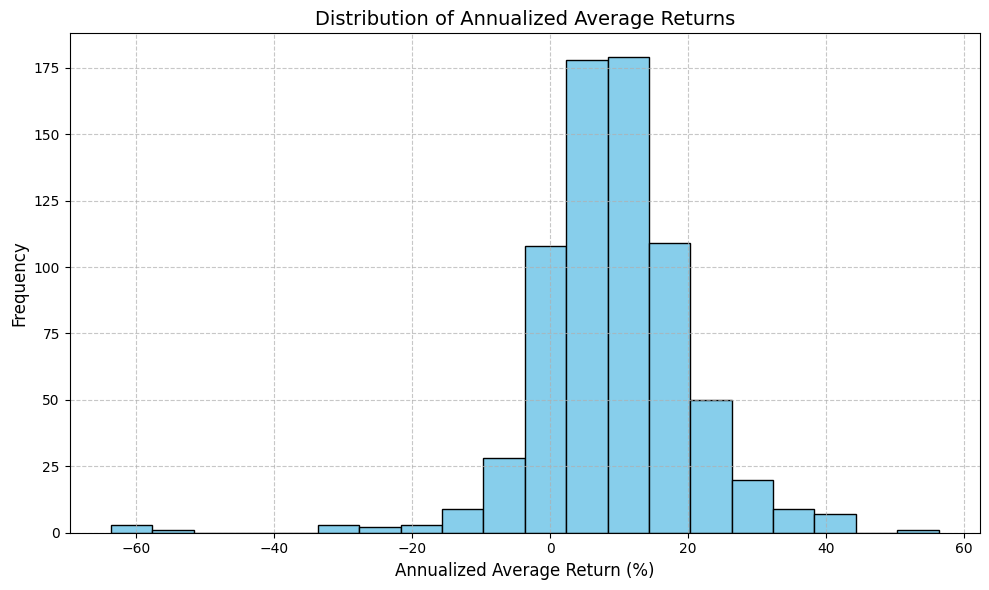

In [89]:
#HISTOGRAM AAR

# Drop rows with NaN values in 'Annualized Average Return'
EM_merged_DS_R_USD_M_AYR = EM_merged_DS_R_USD_M_AYR.dropna(subset=['Annualized Average Return'])

#Plot histogram
plt.figure(figsize=(10, 6))  # Adjust figure size for better visibility
plt.hist(EM_merged_DS_R_USD_M_AYR['Annualized Average Return'] * 100, bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Annualized Average Return (%)', fontsize=12)  # Increase font size
plt.ylabel('Frequency', fontsize=12)
plt.title('Distribution of Annualized Average Returns', fontsize=14)  # Increase font size
plt.grid(True, linestyle='--', alpha=0.7)  # Add a grid for better readability
plt.tight_layout()  # Adjust layout to prevent overlapping elements
plt.show()

In [90]:
#VOLATILITY

T=120

# Calculate volatility for each asset
volatilities = []
for i in range(EM_merged_DS_R_USD_M_AYR.shape[0]): # Iterate using numerical index
    R_p_t = EM_merged_DS_R_USD_M_AYR.iloc[i, 4:].values  # Returns for the asset
    mu_p = np.mean(R_p_t)  # Mean return for the asset
    sigma = np.sqrt((1 / T) * np.sum((R_p_t - mu_p) ** 2))  # Volatility calculation
    volatilities.append(sigma)

# Add the volatility column to the DataFrame
EM_merged_DS_R_USD_M_AYR['Volatility'] = volatilities
EM_merged_DS_R_USD_M_AYR.head()

,ISIN,Name,Country,Region,2014-01-31 00:00:00,2014-02-28 00:00:00,2014-03-31 00:00:00,2014-04-30 00:00:00,2014-05-30 00:00:00,2014-06-30 00:00:00,...,2024-05-31 00:00:00,2024-06-28 00:00:00,2024-07-31 00:00:00,2024-08-30 00:00:00,2024-09-30 00:00:00,2024-10-31 00:00:00,2024-11-29 00:00:00,2024-12-31 00:00:00,Annualized Average Return,Volatility
1,ARALUA010258,ALUAR,AR,EM,0.022384,-0.149263,-0.018792,0.017829,0.025300,-0.020969,...,0.172888,-0.041646,-0.052139,-0.062774,-0.074246,-0.045166,0.106486,-0.077641,0.232388,0.172436
2,ARP125991090,BANCO BBVA ARGENTINA,AR,EM,-0.037527,0.014524,0.118945,0.159405,0.079927,0.128727,...,0.467693,-0.071609,-0.087971,0.175481,-0.047472,0.213821,0.143841,0.205786,0.343283,0.198981
3,ARSIDE010029,TERNIUM ARGENTINA SOCIEDAD ANONIMA,AR,EM,0.028548,-0.081548,0.023276,0.109948,-0.009297,-0.058221,...,0.185672,-0.061673,-0.049536,-0.134653,-0.025457,-0.059132,0.174865,-0.087646,0.237229,0.169678
118,BMG211591018,CHINA YURUN FOOD GROUP,CN,EM,-0.083601,0.028655,-0.148380,-0.066756,-0.056509,-0.019712,...,0.000000,-0.050847,-0.089286,0.156863,0.050847,0.290323,-0.162500,-0.059701,-0.139865,0.187857
146,BRABEVACNOR1,AMBEV ON,BR,EM,-0.081488,0.087626,0.039537,-0.021640,-0.030519,0.011256,...,-0.061723,-0.066038,-0.002754,0.108466,0.057737,-0.090892,-0.023564,-0.060048,-0.036432,0.092097


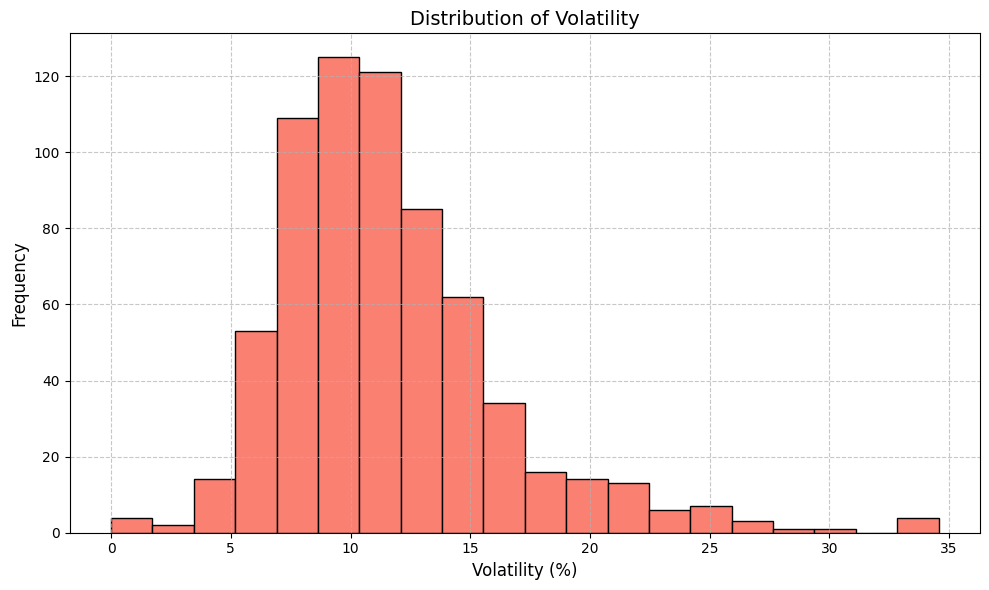

In [91]:
#HISTOGRAM FOR VOLATILITY

plt.figure(figsize=(10, 6))
plt.hist(EM_merged_DS_R_USD_M_AYR['Volatility'] * 100, bins=20, color='salmon', edgecolor='black')
plt.xlabel('Volatility (%)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Distribution of Volatility', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Correlation between Annualized Average Return and Volatility: 0.056183772253159334


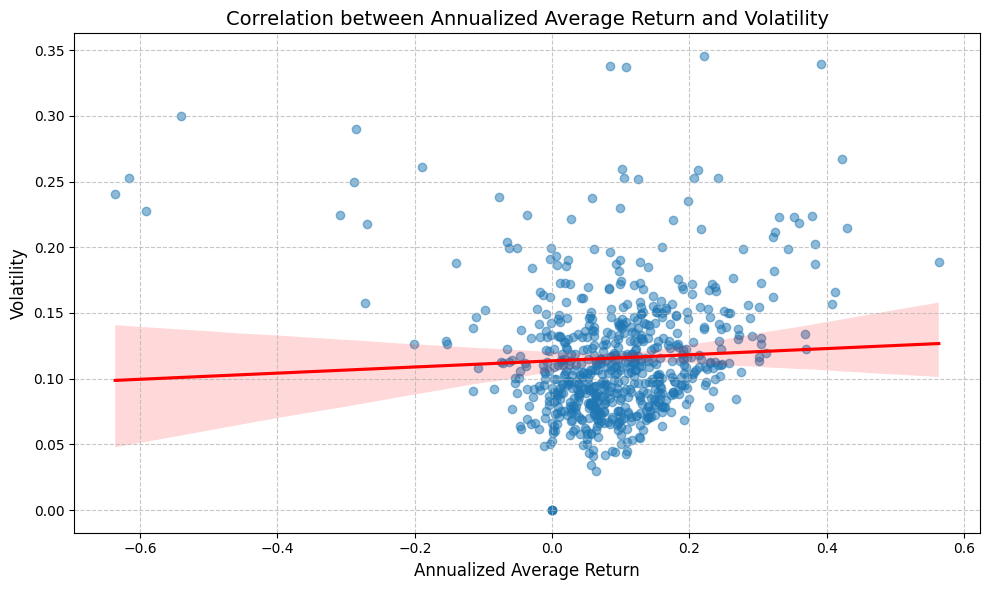

In [92]:
#CORRELATION AAR AND VOLATILITY

# Calculate the correlation
correlation = EM_merged_DS_R_USD_M_AYR['Annualized Average Return'].corr(EM_merged_DS_R_USD_M_AYR['Volatility'])

# Print the correlation
print(f"Correlation between Annualized Average Return and Volatility: {correlation}")

# Create a scatter plot with a correlation line using seaborn
plt.figure(figsize=(10, 6))
sns.regplot(x='Annualized Average Return', y='Volatility', data=EM_merged_DS_R_USD_M_AYR,
            scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})  # Add correlation line
plt.xlabel('Annualized Average Return', fontsize=12)
plt.ylabel('Volatility', fontsize=12)
plt.title('Correlation between Annualized Average Return and Volatility', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Question 2: Equally-weighted/market-cap (value) weighted portfolios (15 points)

## Question 3: Efficient frontier (35 points)

## Question 4: Minimum variance portfolio (40 points)

# MERGING RETURNS TABLE AND ESCORE TABLE FOR EM COUNTRIES

In [93]:
#MEEEEEERGE

# Merging the EScore to EM, from 2003 to 2023

# Merging the data to filter per region
merged_DS_EScore_Y = pd.merge(DS_EScore_Y, Static, on='ISIN', how='inner')
merged_DS_EScore_Y = merged_DS_EScore_Y[['ISIN', 'Name', 'Region'] + [col for col in merged_DS_EScore_Y.columns if col not in ['ISIN', 'Name', 'Region', 'NAME']]]

#Keeping only the columns between 31/12/03 and 31/12/23
start_date = pd.to_datetime('2002-12-31')
end_date = pd.to_datetime('2023-12-31')

# Filter columns excluding non-date columns
date_columns = [col for col in merged_DS_EScore_Y.columns if col not in ['ISIN', 'Name', 'Country', 'Region'] and start_date <= pd.to_datetime(col, errors='ignore') <= end_date]
selected_columns = ['ISIN', 'Name', 'Country', 'Region'] + date_columns
merged_DS_EScore_Y = merged_DS_EScore_Y[selected_columns]


# Filter on EM countries
EM_merged_DS_EScore_Y = merged_DS_EScore_Y[merged_DS_EScore_Y['Region'] == 'EM']
EM_merged_DS_EScore_Y

<ipython-input-93-0a9241ab74ab>:14: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  date_columns = [col for col in merged_DS_EScore_Y.columns if col not in ['ISIN', 'Name', 'Country', 'Region'] and start_date <= pd.to_datetime(col, errors='ignore') <= end_date]


,ISIN,Name,Country,Region,2003,2004,2005,2006,2007,2008,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
1,ARALUA010258,ALUAR,AR,EM,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,15.82,13.26,12.26,11.05,13.19,12.21,17.65
2,ARP125991090,BANCO BBVA ARGENTINA,AR,EM,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,51.51,56.64,76.16,84.68,82.48,88.36,86.99,79.68
3,ARSIDE010029,TERNIUM ARGENTINA SOCIEDAD ANONIMA,AR,EM,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,32.51,33.47,33.72,33.41,33.52,38.37,36.83,48.05
118,BMG211591018,CHINA YURUN FOOD GROUP,CN,EM,NaN,NaN,NaN,NaN,NaN,NaN,...,0.00,0.00,17.85,36.12,45.19,48.35,52.97,63.43,53.70,47.78
145,BRABEVACNOR1,AMBEV ON,BR,EM,NaN,NaN,NaN,NaN,NaN,NaN,...,58.81,66.63,74.17,67.08,55.27,68.85,72.11,77.48,67.51,62.78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2503,ZAE000191342,ALTRON LIMITED A,ZA,EM,NaN,NaN,NaN,NaN,NaN,NaN,...,54.31,56.78,59.55,57.53,30.93,30.08,27.51,38.62,31.87,37.06
2504,ZAE000255915,ABSA GROUP,ZA,EM,NaN,NaN,NaN,NaN,NaN,55.21,...,55.56,68.94,75.90,81.90,80.63,83.03,81.99,81.45,79.12,84.75
2505,ZAE000298253,NORTHAM PLATINUM HLDGS,ZA,EM,NaN,NaN,NaN,NaN,NaN,NaN,...,54.03,52.42,56.64,53.90,63.37,62.03,67.79,73.50,74.37,63.96
2506,ZAE000302618,AVENG,ZA,EM,NaN,NaN,NaN,NaN,NaN,NaN,...,64.66,69.09,70.85,52.33,45.73,44.32,44.52,48.95,31.21,25.61


In [94]:
#FILTERING ONLY FIRMS WITH AN E SCORE FROM 2013 ON

# Remplacer les chaînes de caractères "NaN" par np.nan
EM_merged_DS_EScore_Y = EM_merged_DS_EScore_Y.replace('NaN', np.nan)
EM_merged_DS_EScore_Y = EM_merged_DS_EScore_Y.replace(0, np.nan)

# Convert date columns to datetime if they are not already
date_columns = EM_merged_DS_EScore_Y.columns[4:]  # Assuming 'ISIN', 'Name', 'Country', 'Region' are the first 4 columns
EM_merged_DS_EScore_Y.columns = EM_merged_DS_EScore_Y.columns[:4].tolist() + pd.to_datetime(date_columns, errors='coerce').tolist()

# Select columns from 2013 onwards
start_date = pd.to_datetime('2013-12-31')
date_columns_2013_onwards = [col for col in EM_merged_DS_EScore_Y.columns
                             if isinstance(col, pd.Timestamp) and col >= start_date]

# Filter for rows with no NaN values in the selected columns
EM_merged_DS_EScore_Y = EM_merged_DS_EScore_Y[
    EM_merged_DS_EScore_Y[date_columns_2013_onwards].notna().all(axis=1)
]
EM_merged_DS_EScore_Y

,ISIN,Name,Country,Region,2003-01-01 00:00:00,2004-01-01 00:00:00,2005-01-01 00:00:00,2006-01-01 00:00:00,2007-01-01 00:00:00,2008-01-01 00:00:00,...,2014-01-01 00:00:00,2015-01-01 00:00:00,2016-01-01 00:00:00,2017-01-01 00:00:00,2018-01-01 00:00:00,2019-01-01 00:00:00,2020-01-01 00:00:00,2021-01-01 00:00:00,2022-01-01 00:00:00,2023-01-01 00:00:00
145,BRABEVACNOR1,AMBEV ON,BR,EM,NaN,NaN,NaN,NaN,NaN,NaN,...,58.81,66.63,74.17,67.08,55.27,68.85,72.11,77.48,67.51,62.78
146,BRBBASACNOR3,BANCO DO BRASIL ON,BR,EM,NaN,NaN,NaN,NaN,NaN,72.84,...,90.21,91.78,94.54,94.64,94.43,94.44,91.44,91.20,92.86,93.30
147,BRBBDCACNPR8,BANCO BRADESCO PN,BR,EM,NaN,NaN,NaN,NaN,74.11,91.58,...,83.16,88.79,95.72,96.06,96.32,95.57,94.90,95.52,94.60,97.80
148,BRBRFSACNOR8,BRF BRASIL FOODS ON,BR,EM,NaN,NaN,NaN,NaN,NaN,NaN,...,78.70,75.73,77.90,77.55,77.98,72.71,77.44,81.78,82.94,82.34
149,BRBRKMACNPA4,BRASKEM PN A,BR,EM,NaN,NaN,NaN,NaN,NaN,NaN,...,41.05,44.03,43.06,50.40,53.56,49.96,50.09,51.08,48.23,50.77
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2503,ZAE000191342,ALTRON LIMITED A,ZA,EM,NaN,NaN,NaN,NaN,NaN,NaN,...,54.31,56.78,59.55,57.53,30.93,30.08,27.51,38.62,31.87,37.06
2504,ZAE000255915,ABSA GROUP,ZA,EM,NaN,NaN,NaN,NaN,NaN,55.21,...,55.56,68.94,75.90,81.90,80.63,83.03,81.99,81.45,79.12,84.75
2505,ZAE000298253,NORTHAM PLATINUM HLDGS,ZA,EM,NaN,NaN,NaN,NaN,NaN,NaN,...,54.03,52.42,56.64,53.90,63.37,62.03,67.79,73.50,74.37,63.96
2506,ZAE000302618,AVENG,ZA,EM,NaN,NaN,NaN,NaN,NaN,NaN,...,64.66,69.09,70.85,52.33,45.73,44.32,44.52,48.95,31.21,25.61


In [95]:
# #KEEPING ONLY FIRMS, FROM THE RETURNS TABLE, WITH AN E SCORE FROM 2013 ON

# Create a list of ISINs present in EM_merged_DS_EScore_Y
isin_list = EM_merged_DS_EScore_Y['ISIN'].tolist()

# Filter EM_merged_DS_R_USD_M to keep only rows with ISINs present in the list
filtered_EM_merged_DS_R_USD_M = EM_merged_DS_R_USD_M[EM_merged_DS_R_USD_M['ISIN'].isin(isin_list)].copy()
filtered_EM_merged_DS_R_USD_M

,ISIN,Name,Country,Region,2004-01-30 00:00:00,2004-02-27 00:00:00,2004-03-31 00:00:00,2004-04-30 00:00:00,2004-05-31 00:00:00,2004-06-30 00:00:00,...,2024-03-29 00:00:00,2024-04-30 00:00:00,2024-05-31 00:00:00,2024-06-28 00:00:00,2024-07-31 00:00:00,2024-08-30 00:00:00,2024-09-30 00:00:00,2024-10-31 00:00:00,2024-11-29 00:00:00,2024-12-31 00:00:00
146,BRABEVACNOR1,AMBEV ON,BR,EM,0.009643,0.112451,0.307282,0.089657,0.056188,0.049650,...,-0.014473,-0.060544,-0.061723,-0.066038,-0.002754,0.108466,0.057737,-0.090892,-0.023564,-0.060048
147,BRBBASACNOR3,BANCO DO BRASIL ON,BR,EM,-0.160357,0.091183,0.074352,-0.188388,0.035466,0.082495,...,-0.021737,-0.064611,-0.024629,-0.044654,-0.023276,0.075064,0.011822,-0.088666,-0.070730,-0.050255
148,BRBBDCACNPR8,BANCO BRADESCO PN,BR,EM,-0.061372,0.020959,-0.046010,-0.151264,0.045711,0.081756,...,0.030787,-0.050563,-0.106172,-0.069301,-0.004353,0.265222,-0.015599,-0.072711,-0.140684,-0.108998
149,BRBRFSACNOR8,BRF BRASIL FOODS ON,BR,EM,0.317106,0.002766,0.070504,-0.060311,-0.099105,0.042277,...,0.072827,-0.001119,0.085479,0.154542,-0.087171,0.243162,-0.062344,0.043383,-0.061078,-0.007831
150,BRBRKMACNPA4,BRASKEM PN A,BR,EM,-0.008447,0.150683,-0.026802,-0.235058,-0.239268,0.218490,...,0.245496,-0.221552,-0.124134,-0.105816,-0.034452,0.026009,0.148867,-0.171098,-0.171820,-0.253886
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2560,ZAE000191342,ALTRON LIMITED A,ZA,EM,-0.064573,0.077699,0.098421,-0.062575,0.076836,0.137826,...,0.082942,0.040944,0.127626,0.080433,0.316925,0.012633,0.048533,0.034932,0.097795,0.007029
2561,ZAE000255915,ABSA GROUP,ZA,EM,-0.007591,0.120405,0.054265,-0.128764,0.140361,0.141200,...,-0.082512,0.036311,0.025936,0.095224,0.012335,0.127532,0.070606,-0.063144,0.001226,0.053002
2562,ZAE000298253,NORTHAM PLATINUM HLDGS,ZA,EM,0.153425,-0.009501,0.026379,-0.170561,0.025352,0.010989,...,0.052891,0.113964,0.037187,0.011843,0.124900,-0.242873,0.072477,0.164121,-0.154704,-0.170888
2563,ZAE000302618,AVENG,ZA,EM,-0.065779,-0.087689,0.048295,-0.118338,0.126537,0.007731,...,-0.166667,0.000000,0.000000,0.200000,0.333333,0.125000,0.000000,-0.111111,0.250000,0.000000


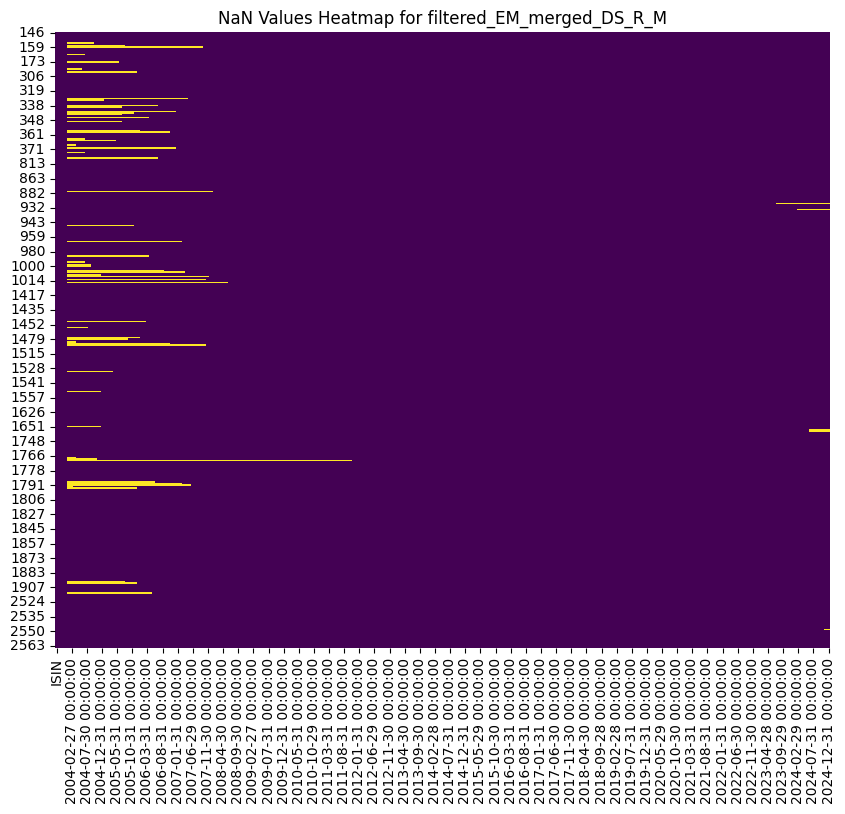

In [96]:
# CREATE HEATMAP OF NAN VALUES

filtered_EM_merged_DS_R_USD_M = filtered_EM_merged_DS_R_USD_M.replace('NaN', np.nan) #making sure the nan values are recognized as such
plt.figure(figsize=(10, 8))
sns.heatmap(filtered_EM_merged_DS_R_USD_M.isnull(), cbar=False, cmap='viridis')
plt.title('NaN Values Heatmap for filtered_EM_merged_DS_R_M')
plt.show()


# HATZOLD RULE: NAN VALUES BETWEEN 2014 AND 2024

In the following part, we will first try to identify which firms to get rid of because of missing values ( time frame: 2004-2024: correct? )

In [97]:
#WHERE ARE THE NAN VALUES SHERLOCK?

# Filter columns for 2014-2024
start_date = pd.to_datetime('2014-01-01')

# Select columns within the desired date range
date_columns_filtered = [col for col in filtered_EM_merged_DS_R_USD_M.columns[4:]
                        if pd.to_datetime(col, errors='coerce') >= start_date
                        and pd.notna(pd.to_datetime(col, errors='coerce'))]

# Filter the DataFrame to keep only the selected columns
filtered_EM_merged_DS_R_USD_M_filtered = filtered_EM_merged_DS_R_USD_M[['ISIN', 'Name', 'Country', 'Region'] + date_columns_filtered].copy()


# Now, find rows with NaN values within the filtered DataFrame
nan_rows = filtered_EM_merged_DS_R_USD_M_filtered[filtered_EM_merged_DS_R_USD_M_filtered.isna().any(axis=1)]

# Assign nan_rows to nan_rows_df
nan_rows_df = nan_rows #Assign the DataFrame

# Display the DataFrame containing the rows with NaN values
print("DataFrame with NaN rows:\n", nan_rows_df.to_string())

DataFrame with NaN rows:
               ISIN                                     Name Country Region  2014-01-31 00:00:00  2014-02-28 00:00:00  2014-03-31 00:00:00  2014-04-30 00:00:00  2014-05-30 00:00:00  2014-06-30 00:00:00  2014-07-31 00:00:00  2014-08-29 00:00:00  2014-09-30 00:00:00  2014-10-31 00:00:00  2014-11-28 00:00:00  2014-12-31 00:00:00  2015-01-30 00:00:00  2015-02-27 00:00:00  2015-03-31 00:00:00  2015-04-30 00:00:00  2015-05-29 00:00:00  2015-06-30 00:00:00  2015-07-31 00:00:00  2015-08-31 00:00:00  2015-09-30 00:00:00  2015-10-30 00:00:00  2015-11-30 00:00:00  2015-12-31 00:00:00  2016-01-29 00:00:00  2016-02-29 00:00:00  2016-03-31 00:00:00  2016-04-29 00:00:00  2016-05-31 00:00:00  2016-06-30 00:00:00  2016-07-29 00:00:00  2016-08-31 00:00:00  2016-09-30 00:00:00  2016-10-31 00:00:00  2016-11-30 00:00:00  2016-12-30 00:00:00  2017-01-31 00:00:00  2017-02-28 00:00:00  2017-03-31 00:00:00  2017-04-28 00:00:00  2017-05-31 00:00:00  2017-06-30 00:00:00  2017-07-31 00:00

In [98]:
#FILTERING NAN VALUES STEP 1: IDENTIFYING "SUSP" or "DELIST" CASES

# Access the company names
company_names = nan_rows_df['Name']

# Filter company names that do contain "SUSP" or "DELIST"
filtered_indices = company_names[company_names.str.contains("SUSP|DELIST", case=False, na=False)].index.tolist()
filtered_indices
num_selected_indices = len(filtered_indices)
print("Number of selected indices:", num_selected_indices)

Number of selected indices: 1


In [99]:
#FILTERING NAN VALUES STEP 2: IDENTIFYING FIRMS WE NEED TO GET RID OF

selected_rows = nan_rows_df.loc[filtered_indices]
nan_rows_df = nan_rows_df.drop(selected_rows.index) #removing the row with nan values that is from a delisted firm
nan_rows_df

,ISIN,Name,Country,Region,2014-01-31 00:00:00,2014-02-28 00:00:00,2014-03-31 00:00:00,2014-04-30 00:00:00,2014-05-30 00:00:00,2014-06-30 00:00:00,...,2024-03-29 00:00:00,2024-04-30 00:00:00,2024-05-31 00:00:00,2024-06-28 00:00:00,2024-07-31 00:00:00,2024-08-30 00:00:00,2024-09-30 00:00:00,2024-10-31 00:00:00,2024-11-29 00:00:00,2024-12-31 00:00:00
928,INE001A01036,HOUSING DEVELOPMENT FINANCE CORPORATION,IN,EM,0.004372,0.024455,0.119625,0.005926,-0.003320,0.112157,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1660,RU0007288411,MMC NORILSK NICKEL,RU,EM,-0.070390,0.089594,0.002980,0.076715,0.062594,0.071892,...,0.020696,0.008713,-0.059271,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1662,RU0007661625,GAZPROM,RU,EM,-0.023704,-0.060319,-0.004441,-0.063058,0.125081,0.075976,...,-0.043806,0.028058,-0.198507,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2549,ZAE000073441,MURRAY & ROBERTS,ZA,EM,-0.132535,0.048138,0.004531,-0.000850,0.031432,-0.051598,...,-0.019613,-0.011445,0.644767,0.137404,0.44,0.027918,-0.046637,-0.240774,NaN,NaN


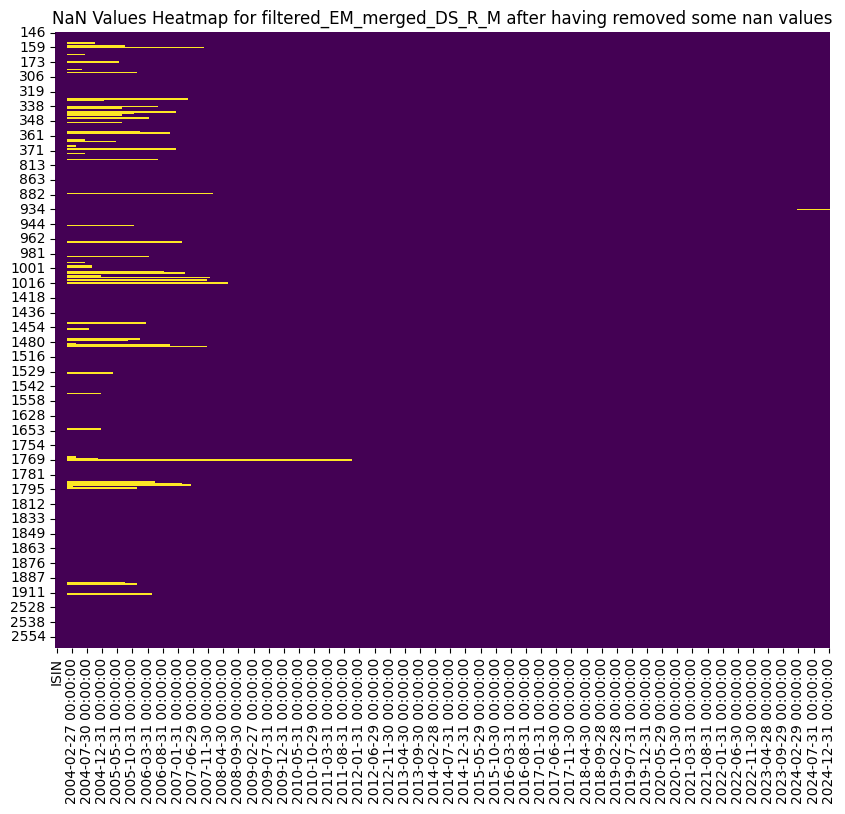

In [100]:
#REMOVING THOSE ROWS FROM OUR TABLE

# Get the indices of rows in nan_rows_df
nan_rows_indices = nan_rows_df.index

# Drop those rows from filtered_EM_merged_DS_R_USD_M
filtered_EM_merged_DS_R_USD_M = filtered_EM_merged_DS_R_USD_M.drop(nan_rows_indices)

#visualizing on heat map
plt.figure(figsize=(10, 8))
sns.heatmap(filtered_EM_merged_DS_R_USD_M.isnull(), cbar=False, cmap='viridis')
plt.title('NaN Values Heatmap for filtered_EM_merged_DS_R_M after having removed some nan values')
plt.show()

In [101]:
#ASSIGNING RETURNS TO 0 FOR FIRMS THAT HAVE DELISTED

#filtered_EM_merged_DS_R_USD_M = filtered_EM_merged_DS_R_USD_M.fillna(0) #CAREFUL BECAUSE FIRST VALUE SHOULD BE -1 AND THEN WE ALLOCATE 0
#filtered_EM_merged_DS_R_USD_M

#visualizing on heat map
#plt.figure(figsize=(10, 8))
#sns.heatmap(filtered_EM_merged_DS_R_USD_M.isnull(), cbar=False, cmap='viridis')
#plt.title('NaN Values Heatmap for filtered_EM_merged_DS_R_M after having removed some nan values')
#plt.show()

# BICHE RULE: NAN VALUES BETWEEN 2003 AND 2013

In [106]:
#CLEANING NAN WITH THE BICHE RULE

def clean_data(dataframe):

    #Cleans the input DataFrame according to the specified rules:

    #1. If a row in 2014 does not have at least 5 years of prior data (no NaN values), it is deleted.
    #2. If there is a single missing value between existing data points, it is replaced with 0.
    #3. If a missing value appears after 2014, it is filled with the average value of the available period before the actual date.


    # Convert date columns to datetime format
    date_columns = dataframe.columns[4:]
    dataframe.columns = dataframe.columns[:4].tolist() + pd.to_datetime(date_columns, errors='coerce').tolist()

    dataframe = dataframe.copy()  # Avoid modifying original DataFrame

    # 1. Delete rows without 5 years of prior data in 2014
    try: # removed the try block
        year_2014_index = dataframe.columns.get_loc(pd.Timestamp('2014-12-31')) # fixed indentation
    except KeyError:
        print("Warning: '2014-12-31' not found in columns. Skipping step 1.")
        year_2014_index = None

    if year_2014_index is not None:
        prior_years = 5 * 12  # Assuming monthly data
        if year_2014_index >= prior_years:
            dataframe = dataframe[
                dataframe.iloc[:, year_2014_index - prior_years: year_2014_index].notna().sum(axis=1) == prior_years]

    # 2. Replace single missing values between existing data points with 0
    for index in range(len(dataframe)):
        row = dataframe.iloc[index, 4:]  # Extract only the date columns
        for i in range(1, len(row) - 1):
            if pd.isna(row.iloc[i]) and not pd.isna(row.iloc[i - 1]) and not pd.isna(row.iloc[i + 1]):
                dataframe.iloc[index, i + 4] = 0  # Offset by 4 to match original indexing

  # 3. Handle NaNs at the end of the row **only if they occur after 2014**
    if year_2014_index is not None:
       for index in range(len(dataframe)):
            row = dataframe.iloc[index, year_2014_index + 1:]  # Consider only post-2014 data
            nan_indices = row[row.isna()].index

            if not nan_indices.empty:
                first_nan_index = nan_indices[0]  # First NaN occurrence

                # Set first NaN to -1
                dataframe.iloc[index, dataframe.columns.get_loc(first_nan_index)] = -1

                # Fill remaining NaNs with 0
                dataframe.iloc[index, dataframe.columns.get_loc(first_nan_index) + 1:] = dataframe.iloc[index, dataframe.columns.get_loc(first_nan_index) + 1:].fillna(0)

    return dataframe

In [109]:
# Apply the cleaning function to our dataframe filtered_EM_merged_DS_R_USD_M

filtered_EM_merged_DS_R_USD_M = clean_data(filtered_EM_merged_DS_R_USD_M)
filtered_EM_merged_DS_R_USD_M

,ISIN,Name,Country,Region,2004-01-30 00:00:00,2004-02-27 00:00:00,2004-03-31 00:00:00,2004-04-30 00:00:00,2004-05-31 00:00:00,2004-06-30 00:00:00,...,2024-03-29 00:00:00,2024-04-30 00:00:00,2024-05-31 00:00:00,2024-06-28 00:00:00,2024-07-31 00:00:00,2024-08-30 00:00:00,2024-09-30 00:00:00,2024-10-31 00:00:00,2024-11-29 00:00:00,2024-12-31 00:00:00
146,BRABEVACNOR1,AMBEV ON,BR,EM,0.009643,0.112451,0.307282,0.089657,0.056188,0.049650,...,-0.014473,-0.060544,-0.061723,-0.066038,-0.002754,0.108466,0.057737,-0.090892,-0.023564,-0.060048
147,BRBBASACNOR3,BANCO DO BRASIL ON,BR,EM,-0.160357,0.091183,0.074352,-0.188388,0.035466,0.082495,...,-0.021737,-0.064611,-0.024629,-0.044654,-0.023276,0.075064,0.011822,-0.088666,-0.070730,-0.050255
148,BRBBDCACNPR8,BANCO BRADESCO PN,BR,EM,-0.061372,0.020959,-0.046010,-0.151264,0.045711,0.081756,...,0.030787,-0.050563,-0.106172,-0.069301,-0.004353,0.265222,-0.015599,-0.072711,-0.140684,-0.108998
149,BRBRFSACNOR8,BRF BRASIL FOODS ON,BR,EM,0.317106,0.002766,0.070504,-0.060311,-0.099105,0.042277,...,0.072827,-0.001119,0.085479,0.154542,-0.087171,0.243162,-0.062344,0.043383,-0.061078,-0.007831
150,BRBRKMACNPA4,BRASKEM PN A,BR,EM,-0.008447,0.150683,-0.026802,-0.235058,-0.239268,0.218490,...,0.245496,-0.221552,-0.124134,-0.105816,-0.034452,0.026009,0.148867,-0.171098,-0.171820,-0.253886
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2560,ZAE000191342,ALTRON LIMITED A,ZA,EM,-0.064573,0.077699,0.098421,-0.062575,0.076836,0.137826,...,0.082942,0.040944,0.127626,0.080433,0.316925,0.012633,0.048533,0.034932,0.097795,0.007029
2561,ZAE000255915,ABSA GROUP,ZA,EM,-0.007591,0.120405,0.054265,-0.128764,0.140361,0.141200,...,-0.082512,0.036311,0.025936,0.095224,0.012335,0.127532,0.070606,-0.063144,0.001226,0.053002
2562,ZAE000298253,NORTHAM PLATINUM HLDGS,ZA,EM,0.153425,-0.009501,0.026379,-0.170561,0.025352,0.010989,...,0.052891,0.113964,0.037187,0.011843,0.124900,-0.242873,0.072477,0.164121,-0.154704,-0.170888
2563,ZAE000302618,AVENG,ZA,EM,-0.065779,-0.087689,0.048295,-0.118338,0.126537,0.007731,...,-0.166667,0.000000,0.000000,0.200000,0.333333,0.125000,0.000000,-0.111111,0.250000,0.000000


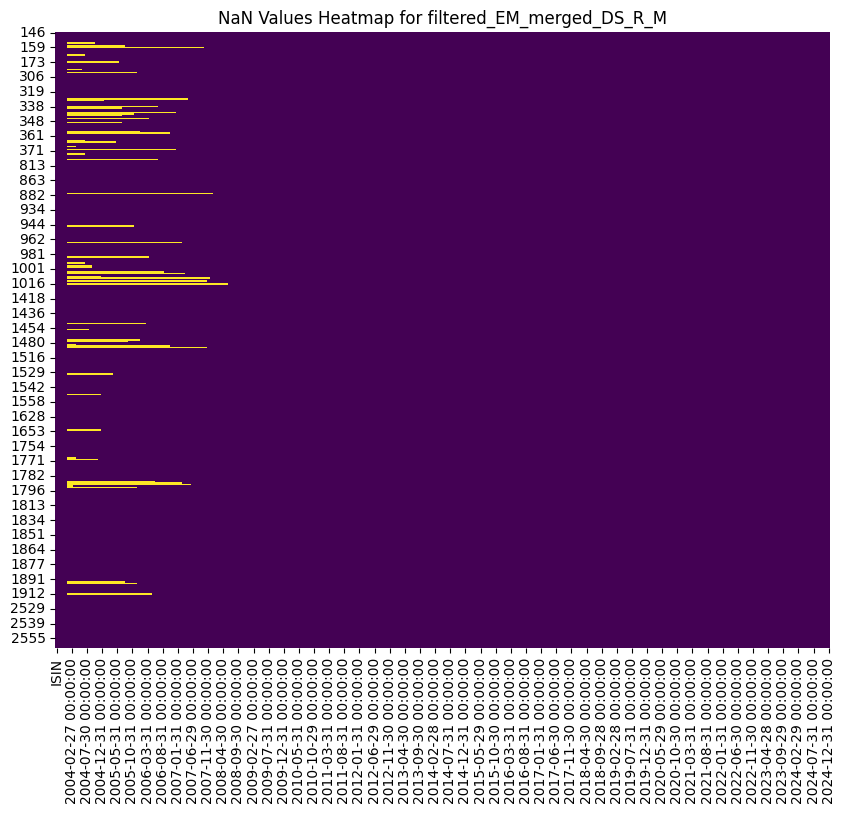

In [108]:
#Heat map for the NaN values in filtered_EM_merged_DS_R_M

# Create a heatmap of NaN values
plt.figure(figsize=(10, 8))
sns.heatmap(filtered_EM_merged_DS_R_USD_M.isnull(), cbar=False, cmap='viridis')
plt.title('NaN Values Heatmap for filtered_EM_merged_DS_R_M')
plt.show()

# EXPECTED RETURNS AND COVARIANCE MATRIX

In [118]:
#CREATE FUNCTION TO COMPUTE EXPECTED RETURNS AND COVARIANCE MATRIX

def compute_statistics(returns_df, year, window=120):

    #Compute expected returns and covariance matrix using past `window` months.

    # Convert date columns to datetime if they are not already
    date_columns = returns_df.columns[4:]
    returns_df.columns = returns_df.columns[:4].tolist() + pd.to_datetime(date_columns, errors='coerce').tolist()

    # Define the training period: past 120 months ending in December of `year`
    end_date = pd.to_datetime(f"{year}-12-31")
    start_date = end_date - pd.DateOffset(months=window - 1)

    # Select the past `window` months of returns
    past_returns = returns_df[[c for c in returns_df.columns[4:]
                               if start_date <= pd.Timestamp(c) <= end_date]]

    # If no columns match the date range, raise a ValueError
    if past_returns.empty:
        raise ValueError(f"No columns found in the specified date range: {start_date} to {end_date}")

    # Reset index to ensure alignment between mu and Sigma
    past_returns = past_returns.reset_index(drop=True)

    # Remove the first four columns (non-date columns)
    past_returns = past_returns.select_dtypes(include=np.number)


    # Calculate tau (window size)
    tau = len(past_returns.columns)

    # Compute expected returns
    mu_Y_plus_1 = (1 / tau) * past_returns.sum(axis=1)

    # Convert mu_Y_plus_1 to a Series with ISIN as index
    mu_Y_plus_1 = pd.Series(mu_Y_plus_1.values, index=returns_df['ISIN'].iloc[past_returns.index])

    # Compute covariance matrix
    deviations = past_returns.sub(mu_Y_plus_1, axis=0)
    Sigma_Y_plus_1 = (deviations.T @ deviations) / tau

    return mu_Y_plus_1, Sigma_Y_plus_1

In [119]:
#COMPUTE ER AND COV MATRIC FOR 2017

year = 2016
expected_returns, covariance_matrix = compute_statistics(filtered_EM_merged_DS_R_USD_M, year)

# Display results
print(f"Expected Returns for {year + 1}:\n", expected_returns)
print(f"\nCovariance Matrix for {year + 1}:\n", covariance_matrix)

Expected Returns for 2017:
 ISIN
BRABEVACNOR1    0.015326
BRBBASACNOR3    0.015583
BRBBDCACNPR8    0.010818
BRBRFSACNOR8    0.012539
BRBRKMACNPA4    0.016228
                  ...   
ZAE000191342   -0.007460
ZAE000255915    0.005909
ZAE000298253    0.005820
ZAE000302618   -0.004949
ZAE000322095    0.001891
Length: 417, dtype: float64

Covariance Matrix for 2017:
                      2007-01-31  2007-02-28  2007-03-30  2007-04-30  \
2007-01-31 00:00:00         NaN         NaN         NaN         NaN   
2007-02-28 00:00:00         NaN         NaN         NaN         NaN   
2007-03-30 00:00:00         NaN         NaN         NaN         NaN   
2007-04-30 00:00:00         NaN         NaN         NaN         NaN   
2007-05-31 00:00:00         NaN         NaN         NaN         NaN   
...                         ...         ...         ...         ...   
2016-08-31 00:00:00         NaN         NaN         NaN         NaN   
2016-09-30 00:00:00         NaN         NaN         NaN         Na

In [122]:
#CONSTRUCTION OF THE MINIMUM VARIANCE PORTFOLIO

def compute_expost_performance(returns_df, weights, year):
    """
    Computes the ex-post performance of the portfolio for a given year.

    Args:
        returns_df (pd.DataFrame): DataFrame of asset returns.
        weights (pd.Series): Series of asset weights for the portfolio, indexed by ISIN.
        year (int): Year for which to compute ex-post performance.

    Returns:
        pd.Series: Series of monthly portfolio returns for the year.
    """
    # Convert date columns to datetime if they are not already
    date_columns = returns_df.columns[4:]
    returns_df.columns = returns_df.columns[:4].tolist() + pd.to_datetime(date_columns, errors='coerce').tolist()

    # Filter returns for the specified year (Y + 1) and select only columns with data
    year_returns = returns_df[[c for c in returns_df.columns[4:] if c.year == year + 1 and c in weights.index]]

    # If no columns match the date range, return an empty Series
    if year_returns.empty:
        return pd.Series(dtype=float, index=pd.date_range(start=f'{year + 1}-01-01', end=f'{year + 1}-12-31', freq='M'))

    # Reset index to ensure alignment between weights and returns
    year_returns = year_returns.reset_index(drop=True)

    # Filter year_returns to include only assets present in weights
    year_returns = year_returns.loc[:, weights.index]

    # Convert returns to numeric
    year_returns = year_returns.apply(pd.to_numeric, errors='coerce')

    # Calculate monthly portfolio returns
    portfolio_monthly_returns = (year_returns * weights).sum(axis=1)

    # Create a Series with monthly dates as index
    portfolio_monthly_returns = pd.Series(portfolio_monthly_returns.values, index=year_returns.columns)

    return portfolio_monthly_returns


def portfolio_sd(weights, returns):
    """
    Calculates the portfolio standard deviation.

    Args:
        weights (np.array): Array of portfolio weights.
        returns (pd.DataFrame): DataFrame of asset returns.

    Returns:
        float: Portfolio standard deviation.
    """
    # Calculate portfolio variance
    portfolio_variance = np.dot(weights.T, np.dot(returns.cov(), weights))

    # Return portfolio standard deviation
    return np.sqrt(portfolio_variance)


def min_variance_portfolio_markowitz_expost(returns_df, start_year, end_year):
    """
    Constructs a minimum variance portfolio with annual rebalancing and rolling window,
    and calculates ex-post performance.
    """
    all_weights = []
    all_expost_returns = []

    # Extract the year as an integer from the Timestamp objects
    start_year = start_year.year
    end_year = end_year.year

    for year in range(start_year, end_year):
        # Calculate portfolio weights
        mu, Sigma = compute_statistics(returns_df, year, window=120)

        # Convert mu and Sigma to NumPy arrays, but preserve mu's index
        mu_arr = mu.to_numpy() if isinstance(mu, pd.Series) else mu # Convert to NumPy array for calculations
        Sigma_arr = Sigma.to_numpy() if isinstance(Sigma, pd.DataFrame) else Sigma # Convert to NumPy array for calculations

        # Define bounds and constraints for optimization
        num_assets = len(mu)
        bounds = [(0, 1) for _ in range(num_assets)]  # Weights between 0 and 1
        constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})  # Weights sum to 1
        equal_weights = np.array([1 / num_assets] * num_assets)  # Initial guess

        # Optimization using sco.minimize
        min_sd_results = sco.minimize(
            fun=portfolio_sd,
            x0=equal_weights,
            # Select returns corresponding to assets in mu and Sigma, using mu's original index:
            args=(returns_df.loc[mu.index, returns_df.columns[4:]].select_dtypes(include=np.number), ), # Use mu.index directly for selection
            method='SLSQP',
            bounds=bounds,
            constraints=constraints
        )
        weights = min_sd_results.x

        # Store the weights as a Series with ISIN as index
        weights_series = pd.Series(weights, index=returns_df.loc[mu.index]['ISIN']) # Use mu.index directly for selection
        all_weights.append(weights_series)

        # Compute ex-post performance for the year
        expost_returns = compute_expost_performance(returns_df, weights_series, year)
        all_expost_returns.append(expost_returns)

    # Concatenate ex-post returns for all years
    all_expost_returns = pd.concat(all_expost_returns)

    return all_expost_returns, all_weights

In [123]:
#HOW TO USE

# Call the function
expost_returns, weights = min_variance_portfolio_markowitz_expost(filtered_EM_merged_DS_R_USD_M, start_year, end_year)

# Print the results DataFrame
print(expost_returns)

# Print the weights (if needed)
# for i, year in enumerate(range(start_year, end_year)):
#     print(f"Portfolio weights for {year + 1}:")
#     print(all_weights[i])
#     print("\n")

KeyError: "None of [Index(['BRABEVACNOR1', 'BRBBASACNOR3', 'BRBBDCACNPR8', 'BRBRFSACNOR8',\n       'BRBRKMACNPA4', 'BRCCROACNOR2', 'BRCMIGACNPR3', 'BRCPFEACNOR0',\n       'BRCPLEACNPB9', 'BRCYREACNOR7',\n       ...\n       'ZAE000093779', 'ZAE000097580', 'ZAE000109815', 'ZAE000117321',\n       'ZAE000170049', 'ZAE000191342', 'ZAE000255915', 'ZAE000298253',\n       'ZAE000302618', 'ZAE000322095'],\n      dtype='object', name='ISIN', length=417)] are in the [index]"